<a href="https://colab.research.google.com/github/Holmes-Alan/CLAST/blob/main/CLAST_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Check GPU avaliablity

In [ ]:
!nvidia-smi
import torch
print("current avaliable GPU number is: ", torch.cuda.device_count())

Tue Mar 12 15:50:01 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   48C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

# Download code

In [ ]:
!git clone https://github.com/Holmes-Alan/CLAST.git

Cloning into 'CLAST'...
remote: Enumerating objects: 27, done.
remote: Counting objects: 100% (27/27), done.
remote: Compressing objects: 100% (24/24), done.
remote: Total 27 (delta 2), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (27/27), 1.56 MiB | 3.43 MiB/s, done.
Resolving deltas: 100% (2/2), done.


# Enter into the working directory

In [ ]:
cd CLAST/lib

/content/CLAST/lib


In [ ]:
!git clone https://github.com/openai/CLIP.git

Cloning into 'CLIP'...
remote: Enumerating objects: 251, done.
remote: Counting objects: 100% (8/8), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 251 (delta 3), reused 3 (delta 0), pack-reused 243
Receiving objects: 100% (251/251), 8.93 MiB | 13.64 MiB/s, done.
Resolving deltas: 100% (127/127), done.


# Install required pachkages

In [ ]:
%cd ..
!pip install -r requirements.txt
!pip install --upgrade --no-cache-dir gdown

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.4/53.4 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 801.6/801.6 kB 22.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.6/44.6 kB 6.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 840.4/840.4 kB 71.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.2/307.2 kB 39.8 MB/s eta 0:00:00
  Created wheel for mamba-ssm: filename=mamba_ssm-1.2.0.post1-cp310-cp310-linux_x86_64.whl size=137575158 sha256=58676ee1a5d6dbd6f124152f7e6c4d626af02fac60bd09028c163ca240a50c7f
  Stored in directory: /root/.cache/pip/wheels/22/6e/60/ddd5c574b5793a30028f2cabdacd2a3ec2276edaaa8c00fd35
Successfully built mamba-ssm


# Install CLIP

In [ ]:
!pip install ./lib/CLIP

Processing ./lib/CLIP
  Preparing metadata (setup.py) ... done
  Created wheel for clip: filename=clip-1.0-py3-none-any.whl size=1369497 sha256=39adc94927a22d742659a22c5fd964468eba45ff8bcce99aa64b2144f2722fa6
  Stored in directory: /tmp/pip-ephem-wheel-cache-qcdhi1mq/wheels/98/57/54/3313bae5c3f10d74450300032cf91abcd2cf77c9856f06d70d
Successfully built clip


# Download Model Files


In [ ]:
%mkdir models
%mkdir pretrained_models
!gdown --id 1N-_Uip8ZBBnzWl_LswWI-Ls9VQ8-4rqd -O models/wikiart_all.ckpt
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=19ZbeHK2UxzzTNeDMcWfE1TbyFkBUurns' -O pretrained_models/vgg_normalised.pth

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:138: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Failed to retrieve file url:

	Cannot retrieve the public link of the file. You may need to change
	the permission to 'Anyone with the link', or have had many accesses.

You may still be able to access the file from the browser:

	https://drive.google.com/uc?id=1N-_Uip8ZBBnzWl_LswWI-Ls9VQ8-4rqd

but Gdown can't. Please check connections and permissions.
--2024-03-12 15:54:34--  https://docs.google.com/uc?export=download&id=19ZbeHK2UxzzTNeDMcWfE1TbyFkBUurns
Resolving docs.google.com (docs.google.com)... 142.251.2.101, 142.251.2.138, 142.251.2.100, ...
Connecting to docs.google.com (docs.google.com)|142.251.2.101|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=19ZbeHK2UxzzTNeDMcWfE1TbyFkBUurns

# Artist Style Transfer using Texts
> You can find some **artists' names** from wikiauthors.txt file.

```sh
$ python demo_edit_art_style.py --content %path-to-your-content-image% --style %artistic-text%

# Example
python demo_edit_art_style.py --content data/content/14.jpg --style vangogh
```

In [ ]:
from IPython.display import display
from argparse import Namespace
import torch
import pathlib
from lib.pl_utils import UnNormalize
from model_define import StyleTransfer
import torchvision.transforms as transforms
from PIL import Image
import clip
import torchvision.utils as vutils
from torchvision.transforms.functional import adjust_contrast
import time

source = "a Photo"

text = "Oil Painting in Pablo Picasso style" #@param {"type": "string"}
image_dir = "/content/CLAST/dataset/content/10.jpg" #@param {type: "string"}

test_args = {
    "content_path":image_dir,
    "text":text
}

args = Namespace(**test_args)

def read_content_img(img_path, img_siz=512):
    transform_list = [transforms.Resize((img_siz, img_siz)),
                      transforms.ToTensor(),
                      transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])]
    m_transform = transforms.Compose(transform_list)
    img = Image.open(img_path).convert('RGB')
    img_tensor = m_transform(img)
    return img_tensor.unsqueeze(0).cuda()


def read_style_img(img_path, img_siz=512):
    style_img = read_content_img(img_path, img_siz)
    style_name = os.path.basename(os.path.dirname(img_path))
    print(style_name)
    return style_img, clip.tokenize(style_name.replace("_", " "))[0].unsqueeze(0).cuda()


def custom_text(text):
    return clip.tokenize(text)[0].unsqueeze(0)

m_model = StyleTransfer.load_from_checkpoint("models/wikiart_all.ckpt", strict=False).cuda()

I_c = read_content_img(opt.content)
F_c = m_model.encoder(I_c)
F_clip_c = m_model.text_editor.encode_img(I_c)

st = time.time()
prompt = opt.style.replace('_', ' ')
text_input = custom_text(opt.style).cuda()
meta = m_model.text_editor.forward(text_input)
F_clip_text = meta['raw_feat']
F_clip_text = F_clip_text.unsqueeze(1)
styled = m_model.transform(F_clip_c['raw_feat'], F_clip_text, F_c)
# decoding
I_cs = m_model.decoder(styled)
et = time.time()
print('computation time=================', et-st)

# visualize
m_unnormalize = UnNormalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225))

content = m_unnormalize(I_c).clamp(0, 1).cpu().data
transfer = m_unnormalize(I_cs).clamp(0, 1).cpu().data

transfer = adjust_contrast(transfer,1.5)

out = transfer.squeeze(0)
ndarr = out.mul(255).add_(0.5).clamp_(0, 255).permute(1, 2, 0).to('cpu', torch.uint8).numpy()
im = Image.fromarray(ndarr)
save_path = 'output/' + pathlib.Path(opt.content).stem + '_' + pathlib.Path(opt.style).stem + '.png'
im.save(save_path)
# visualize style transfer
from IPython.display import Image
Image(save_path)

# Artistic Style Transfer for videos

In [ ]:
!pip install mmcv opencv-python

Get a sample video

In [ ]:
import mmcv, cv2
from IPython import display

video = mmcv.VideoReader('dataset/video_demo.mp4')
frames = [Image.fromarray(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)) for frame in video]
display.Video('dataset/video_demo.mp4', width=640)

Run video through CLAST

In [ ]:
frames_tracked = []
for i, frame in enumerate(frames):
    print('\rTracking frame: {}'.format(i + 1), end='')

    # Detect faces
    boxes, _ = mtcnn.detect(frame)

    # Draw faces
    frame_draw = frame.copy()
    draw = ImageDraw.Draw(frame_draw)
    for box in boxes:
        draw.rectangle(box.tolist(), outline=(255, 0, 0), width=6)

    # Add to frame list
    frames_tracked.append(frame_draw.resize((720, 360), Image.BILINEAR))
print('\nDone')

Display video style transfer

In [ ]:
d = display.display(frames_tracked[0], display_id=True)
i = 1
try:
    while True:
        d.update(frames_tracked[i % len(frames_tracked)])
        i += 1
except KeyboardInterrupt:
    pass

Save processed video

In [ ]:
dim = frames_tracked[0].size
fourcc = cv2.VideoWriter_fourcc(*'FMP4')
video_tracked = cv2.VideoWriter('output/video_ST.mp4', fourcc, 25.0, dim)
for frame in frames_tracked:
    video_tracked.write(cv2.cvtColor(np.array(frame), cv2.COLOR_RGB2BGR))
video_tracked.release()

# Artist Style Transfer in Command.

In [ ]:
!python demo_edit_art_style.py --content data/content/14.jpg --style van_gogh

Global seed set to 123
/usr/local/lib/python3.7/dist-packages/pytorch_lightning/core/saving.py:218: UserWarning: Found keys that are not in the model state dict but in the checkpoint: ['simCLR.temperature']
  f"Found keys that are not in the model state dict but in the checkpoint: {keys.unexpected_keys}"
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3635: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode)


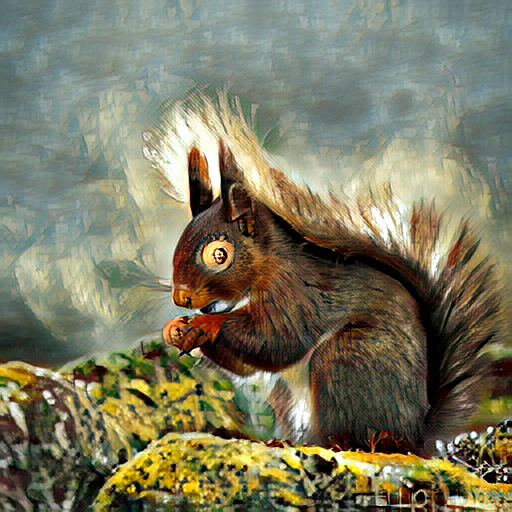

In [ ]:
# visualize a sample image
from IPython.display import Image
Image('/content/TxST/output/14_vangog!h.png')